---
**<h1><center> </center></h1>**

**<h1><center> Proyecto: Clasificación de cáncer de piel </center></h1>**

**<h2><center> [tipos] </center></h2>**

**<h2><center> Visión Por Computador - 2024-2</center></h2>**

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Escudo_unal_2016.png" width="100"></center>

---


<h1> Integrantes: </h1>

* Camilo Loaiza Fonnegra: cloaiza@unal.edu.co

* Luis Santiago Maya Restrepo: lmayar@unal.edu.co

* Jhon Sebastián Sepúlveda Nomesque: jsepulvedan@unal.edu.co

* Luis Alexander Torres Aguirre: luatorresag@unal.edu.co

* Andrés Felipe Zapata Osorio: anzapatao@unal.edu.co


# Descripción del Trabajo

# Descripción del Dataset

En 2018 es liberada la primera version del dataset [The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions](https://www.nature.com/articles/sdata2018161), publicado por Philipp Tschandl, Cliff Rosendahl y Harald Kittler, en este podemos encontrar 10015 imagenes dermatoscópicas captadas en el periodo de 20 años, estas se obtuvieron de dos fuentes diferentes, la primera del departamento de dermatologia de la universidad de Vienna(Austria) y la investigacion de cancer de piel liderada por el Profesor Cliff Rosendahl en Queensland(Australia). En el enlace anterior se puede evidenciar el proceso realizado para el tratamiento de las imagenes y su categorizacion.

En este dataset encontraremos las 10015 imagenes dermatoscópicas en formato JPEG(8-bit) en alta calidad (300DPI; 15*10 cm), para un manejo adecuado el equipo que publica el dataset centro y adapto las imagenes a un tamaño de 800x600 px, el proceso automatizado para realizar la extraccion y limpieza del mismo se puede encontrar en el repositiorio github [HAM 10000 Dataset Tools](https://github.com/ptschandl/HAM10000_dataset).

Dentro del dataset existen dos carpetas con el conjunto de 10015 imagenes las cuales y como se menciono previamente estan en formato JPEG, tambien contamos con 5 archivos CSV los cuales nos ayudan con el preprocesamiento de las imagenes en diferentes tamaños y 

- **MEL:** Melanoma.
- **NV:** Melanocytic nevi
- **BCC:** Basal cell carcinoma.
- **AKIEC:**  Bowen's disease / Actinic keratoses and intraepithelial carcinoma.
- **BKL:** Benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses)
- **DF:** Dermatofibroma
- **VASC:** Vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage).


Partiendo del anterior dataset, encontramos una version modificada en el sitio Kaggel el cual usaremos para el desarrollo de nuestro trabajo final, lo pedomos encontrar en el siguiente link [Skin cancer: HAM10000](https://www.kaggle.com/datasets/surajghuwalewala/ham1000-segmentation-and-classification/data), este puede ser descargado o se puede integrar directamente en el notebook.
Realizando una exploracion inicial encontramos el siguiente resumen del archivo.

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [56]:
path_file_csv = "D:\JSS\ACADEMIA\IA_Especializacion\Semestre_2\ComputerVision\TrabajoFinalAdicionales\hmnist_28_28_RGB.csv"
hmnist_28_28_L = pd.read_csv(path_file_csv)



In [46]:
hmnist_28_28_L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [57]:
# Conjunto de entrenamiento
train_images_fina = hmnist_28_28_L.drop('label',axis=1)
train_images_final = train_images_fina.values
train_images_final = train_images_final.reshape(-1,28,28,3)
train_images_final.shape

(10015, 28, 28, 3)

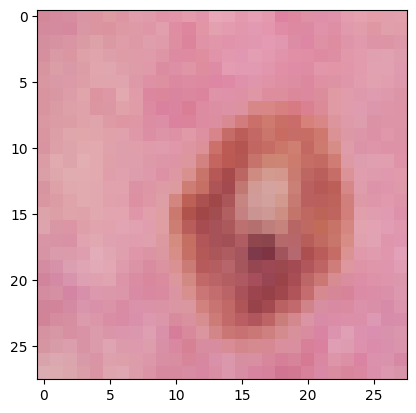

In [58]:
plt.imshow(train_images_final[999])

In [ ]:

path_file_csv = "D:\JSS\ACADEMIA\IA_Especializacion\Semestre_2\ComputerVision\TrabajoFinalAdicionales\HAM10000_metadata.csv"
skinInjuriesCsv = pd.read_csv(path_file_csv)

In [16]:
skinInjuriesCsv.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [17]:
skinInjuriesCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [19]:
skinInjuriesCsv.describe(include=[object])

,lesion_id,image_id,dx,dx_type,sex,localization
count,10015,10015,10015,10015,10015,10015
unique,7470,10015,7,4,3,15
top,HAM_0000835,ISIC_0032258,nv,histo,male,back
freq,6,1,6705,5340,5406,2192


In [20]:
path_file_csv = "D:\JSS\ACADEMIA\IA_Especializacion\Semestre_2\ComputerVision\TrabajoFinalAdicionales\hmnist_28_28_RGB.csv"
file28x28 = pd.read_csv(path_file_csv)

In [21]:
file28x28.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [28]:
file28x28.groupby('label')

## Visualización de las Imágenes

## Análisis de Ruido en las Imágenes

## Análisis de Modelo de Color

## Histogramas